In [12]:
# A comparison of a several classifiers in scikit-learn on synthetic datasets. 
# The point of this example is to illustrate the nature of decision boundaries of different classifiers. 

%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

h = .02  # step size in the mesh

# Define classifiers to be compared
classifiers = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Nearest Neighbors": KNeighborsClassifier(3),
    "Logistic Regression":LogisticRegression(C=1e5),
    "Naive Bayes": GaussianNB(),
    "Linear SVM": SVC(kernel="linear", C=0.025),
    "RBF SVM": SVC(gamma=2, C=1),
    #"Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    #"Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(), 
    #"AdaBoost": AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    }

In [13]:
## Create data sets

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1) ]
# make_circles and make_moons generate 2d binary classification datasets 
# that are challenging to certain algorithms (e.g. centroid-based clustering or linear classification),
# including optional Gaussian noise.
# make_moons makes two interleaving half circles.
# make_circles makes a large circle containing a smaller circle in 2d.

# make_classification creates multiclass datasets by allocating each class one or more normally-distributed clusters of points. 
# make_classification specialises in introducing noise by way of: correlated, redundant and uninformative features; multiple Gaussian clusters per class; and linear transformations of the feature space.
try: 
    X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                            n_clusters_per_class=1, random_state=1)
    rng = np.random.RandomState(2)
    X += 2 * rng.uniform(size=X.shape)
    linearly_separable = (X, y)
    datasets.append(linearly_separable)
except:  # make_classification might not work with older version of sklearn
    pass

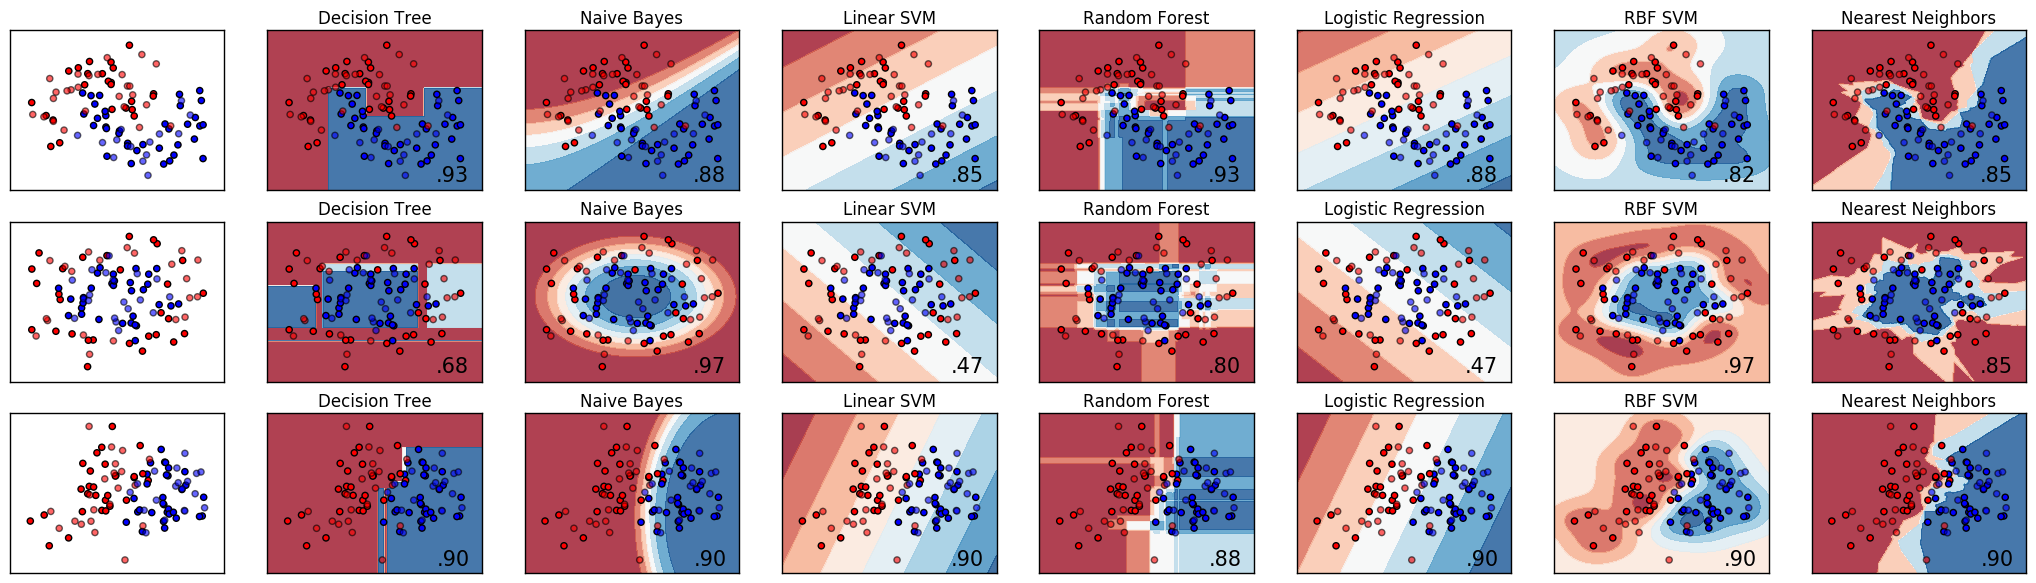

In [14]:
figure = plt.figure(figsize=(len(classifiers)*len(datasets), len(classifiers)))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].  
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in classifiers.items():
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. 
        # For that, we will assign a color to each point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)
        # The plots show training points in solid colors and testing points semi-transparent. 

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        # The lower right shows the classification accuracy on the test set.
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

# The plots show training points in solid colors and testing points semi-transparent. The lower right shows the classifi-
# cation accuracy on the test set.

In [8]:
# What differences do you observe among the different classifiers? 
# How does each classifier perform for the different data sets?

# In high-dimensional spaces, data can more easily be separated linearly and the simplicity of classifiers
# such as naive Bayes and linear SVMs might lead to better generalization than is achieved by other classifiers.